In [1]:
#This code is written for data visualisation. Unshuffled iris datset is used here.
# Libraries likevnumpy,pandas and matplot are used for plotting
import numpy as np
class slp:
    def fitting(self,z,y):
        self.w=np.zeros(1+z.shape[1])
        self.e=[]
        for i in range(1000):
            error=0
            for inp,tar in zip(z,y):
                diff= (tar-self.pre(inp))
                self.w[1:]+= diff * inp * 0.1
                self.w[0]+=diff*0.1
                error=error + int(diff*0.1!=0.0)
            self.e.append(error)
        return self
    def fun(self,z):
        return np.dot(z,self.w[1:])+self.w[0]
    def pre(self,z):
        return np.where(self.fun(z)>=0.0,1,-1)
    


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


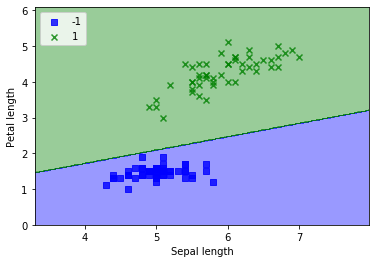

In [8]:
#This is the graph of sepal vs petal length
import pandas as p
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as pt
data_df=p.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y=data_df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
z=data_df.iloc[0:100,[0,2]].values
pp=slp()
pp.fitting(z,y)

def plot_decision_regions(z,y,cl):
    resolution=0.02
    mar=('s','x','o','^','v')
    col=('blue','green','lightgreen','gray','cyan')
    cmap=ListedColormap(col[:len(np.unique(y))])
    
    mini_1=z[:,0].min()-1
    maxi_1=z[:,0].max()+1
    mini_2=z[:,1].min()-1
    maxi_2=z[:,1].max()+1
    
    x_axis,y_axis=np.meshgrid(np.arange(mini_1,maxi_1,resolution),np.arange(mini_2,maxi_2,resolution))
    
    clasi = cl.pre(np.array([x_axis.ravel(),y_axis.ravel()]).T)
    clasi=clasi.reshape(x_axis.shape)
    pt.contourf(x_axis,y_axis,clasi,alpha=0.4,cmap=cmap)
    pt.xlim(x_axis.min(),x_axis.max())
    pt.ylim(y_axis.min(),y_axis.max())
    
    for b,d in enumerate(np.unique(y)):
        pt.scatter(x=z[y==d,0],y=z[y==d,1] ,alpha=0.8, c=cmap(b),marker=mar[b],label=d)
plot_decision_regions(z,y,cl=pp)
pt.xlabel('Sepal length')
pt.ylabel('Petal length')
pt.legend(loc='upper left')
pt.show()